#  Logistic Regression Using Gradient Descent 

## Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

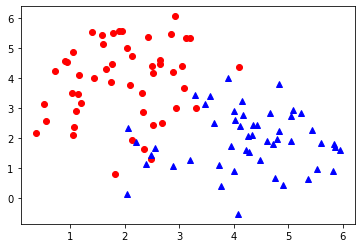

In [3]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


## Logistic Regression

A brief description of Logistic Regression


A Logistic regression model is frequently used to approximate a function whose output ranges from 0 to 1. The hypothesis function is as shown below

$$ h(\mathbf{x}; \mathbf{w}, b) = \sigma \left( \mathbf{w}^T \mathbf{x} + b \right ) $$

Note that $\mathbf{x}$ is usually the $d$ dimensional input, but it can also be modified to contain some function of the actual inputs. That is, we can create an $\mathbf{x}$ vector as shown below even if we only get $[x_1, x_2]^T$ as input

$$ 
\mathbf{x} = \begin{bmatrix}
x_1 \\
x_2 \\
\phi_1 (x_1) \\
\phi_1 (x_2) \\
\vdots \\
\phi_2 (x_1) \\
\phi_2 (x_2) \\
\vdots
\end{bmatrix}
$$

Here, functions $\phi_j$ are called **bias functions** because they introduce new dimensions of the original inputs. The $\sigma ( \cdot  )$ is the **sigmoid function** which is defined as

$$\sigma (x) = \frac{1}{1+e^{-x}}$$

It is close to $0$ for a highly negative value, it is close to $1$ for a very high value.
Usually, a $1$ is appended with $\mathbf{x}$ and the $b$ (bias) is added to the weights. So the hypothesis becomes

$$ h(\mathbf{x};\mathbf{w}) = \sigma \left( \mathbf{w}^T\mathbf{x} \right ) = \frac{1}{1+e^{-\mathbf{w}^T \mathbf{x}}} $$


### Training

The $\mathbf{w}$ vector consists of optimizable weights. This has to be estimated by minimizing a loss function like the **Mean Squared Error** or the squared error. An example loss function is as shown below

$$ J = \frac{1}{2} \sum_{i} \left( \sigma \left( \mathbf{w}^T \mathbf{x}_i \right ) - y_i \right )^2 $$

The gradient of this has to be calculated over the sigmoid function. The gradient of sigmoid function is as shown below

$$ \frac{d}{dx} \left( \sigma (x) \right ) = \frac{d}{dx} \left( \frac{1}{1+e^{-x}} \right ) = - \left( 1 + e^{-x} \right )^{-2} \left( -e^{-x} \right ) = \frac{e^{-x}}{\left( 1+e^{-x} \right )^2} $$

This implies

$$ \frac{d}{dx} \left( \sigma (x) \right ) = \left( \frac{1}{1+e^{-x}} \right ) \left( 1 - \frac{1}{1+e^{-x}} \right ) \Rightarrow \frac{d}{dx} \left( \sigma (x) \right ) = \sigma(x) \left( 1 - \sigma(x) \right ) $$

Therefore, the gradient calculation for $J$ is given by

$$ \frac{\partial J}{\partial \mathbf{w}} = \sum_i \left( \sigma \left ( \mathbf{w}^T \mathbf{x}_i \right ) - y_i \right ) \frac{d}{d \mathbf{w}} \sigma \left ( \mathbf{w}^T \mathbf{x}_i \right ) $$

Which implies

$$ \frac{\partial J}{\partial \mathbf{w}} = \sum_i \left [ \sigma \left ( \mathbf{w}^T \mathbf{x}_i \right ) - y_i \right ] \left [ \left ( \sigma \left ( \mathbf{w}^T \mathbf{x}_i \right ) \right ) \left ( 1 - \sigma \left ( \mathbf{w}^T \mathbf{x}_i \right ) \right ) \right ] \mathbf{x}_i $$




#### Gradient Descent

Gradient Descent is an algorithm that is used to find the local minimum of a function through an iterative process. In its simple form, it uses only the first derivative, that is the **gradient**.

Say we want to optimize / find the local minimum of function $L(\mathbf{w})$. We first find the first derivative of this function and the use that derivative to reduce its value. Note that the derivative at a point returns the direction of ascent (increase in value), we're interested in doing the opposite (directionally). We therefore apply the following iteratively (timestep $t$ to $t+1$)

$$ \mathbf{w}_{t+1} = \mathbf{w}_{t} - \eta \, \frac{\partial L}{\partial \mathbf{w}_t} $$

Where $\eta$ is the learning rate (the step size to take). Note that $L$ is called the **Loss Function** (or the _cost function_) and it exists in the parameter space. We need to create this function such that it finds the correct $\mathbf{w}$ values at its minimum.


### Implementation of Logistic Regression


In [9]:
class LogisticBasisRegressor:
    """
        Creates a Logistic Regression model with basis functions. Can
        accept any range of functions as basis functions. Currently,
        only constant learning rate is allowed when training.
    """

    # Sigmoid function
    @staticmethod
    def _sigmoid(x):
        """
        Returns the sigmoid of the value passed.

        Parameters:
        - x: float or np.ndarray
            The input value or array. If array is passed, sigmoid is
            applied element-wise.
        
        Returns:
        - sig_x: float or np.ndarray
            The sigmoid function applied to every value of the input
        """
        return 1/(1+np.exp(-x))

    # Constructor
    def __init__(self, train_x, train_y, basis_fs = None) -> None:
        """
        Creates a LogisticBasisRegressor object that must be given
        the training data at initialization. Along with it, it must
        also get an array of basis functions (if applicable). Use the
        `train` function to train the mode (get correct parameters)
        and use the `test` function to get inference.
        The final augmented training input data will have dimensions
        of (N, d + b*d + 1), the first 'd' columns are as passed,
        then for every basis function passed, 'd' columns are added
        and then the last column is all ones. The model will
        therefore have `d + b*d + 1` parameters (weights and bias).

        Paramters:
        - train_x: numpy.ndarray    shape: (N, d)
            The training input data. Must have 'N' samples, with each
            sample having 'd' dimensions. The training data needn't
            be augmented (don't add basis fields and bias). This job
            is handled internally.
        - train_y: numpy.ndarray    shape: (N, 1) or (N,)
            The output values of the training samples. Must have 'N'
            samples.
        - basis_fs: None or list of callable    len: b
            List of basis functions to use for every dimension. The
            same basis functions are applied to all dimensions of
            training input data.
        """
        self.N, self.d = train_x.shape
        self.b = 0
        # Annotate the training data (x values)
        x_train: np.ndarray = train_x
        self.basis_funcs = basis_fs
        if self.basis_funcs is not None:
            self.b = len(self.basis_funcs)
            for fnc in self.basis_funcs:
                an_x = fnc(train_x)
                x_train = np.hstack((x_train, an_x))
        self.x_train = x_train
        # Output values
        self.y_train = np.array(train_y, dtype=float)
        # Optimizable parameters
        self.weights = np.random.random_sample((self.d*(1+self.b), 1))
        self.bias = np.random.random_sample(1)
    
    # Train the model
    def train(self, lr = 0.1, num_iter = 100, init_weights = None, init_bias = None):
        """
        Train the logistic regressor to find the optimal weights and
        biases.

        Parameters:
        - lr: float     default: 0.1
            The learning rate to use for gradient descent
        - num_iter: int     default: 100
            Number of iterations to run the training for
        - init_weights: None or numpy.ndarray   shape: (d*(1+b), 1)
            Initial weights for training, if array is passed. Else,
            if left as None, initialization has random weights.
        - init_bias: None or numpy.ndarray      shape: (1, 1)
            Initial bias for training, if array or number is passed.
            Else, if left as None, initialization has random bias.
        
        Returns:
        - cost_vals: np.ndarray     shape: (num_iter,)
            A history of cost values
        - param_vals: np.ndarray    shape: (num_iter, M)
            A history of parameter (weight and bias) values. M is the
            number of weights + 1 (for bias)
        - grad_vals: np.ndarray     shape: (num_iter, M)
            A history of gradient (changes applied to the weights)
            calculations during training.
        """
        if init_weights is not None:
            self.weights = np.array(init_weights).reshape(self.d*(1+self.b), 1)
        if init_bias is not None:
            self.bias = np.array(init_bias).reshape(1, 1)
        # Annotate training data
        X = np.hstack((self.x_train, np.ones((self.N, 1), dtype=float)))
        W = np.vstack((self.weights, self.bias))
        # Ensure correct dimensions
        X = X.reshape(self.N, self.d*(1+self.b)+1)
        Y = np.array(self.y_train).reshape(self.N, 1)
        W = W.reshape(self.d*(self.b+1)+1, 1)
        # Some hyperparameters
        eta = float(lr)
        n_iter = int(num_iter)
        # X, Y and W will be used hereon
        # Logging
        param_vals = []
        cost_vals = []
        grad_vals = []
        # --- Batch Gradient Descent ---
        for _ in range(n_iter):
            # Cost value
            sg = self._sigmoid(X@W)
            cost_val = np.sum((sg-Y)**2)/2
            # Gradient values
            dJ = X.T @ ((sg-Y)*sg*(1-sg))
            # Log all values
            param_vals.append(W.flatten())
            grad_vals.append(dJ.flatten())
            cost_vals.append(cost_val)
            # Gradient descent update
            W = W - eta * dJ
        self.weights = W[:(self.d*(1+self.b))]
        self.bias = W[-1]
        # Make all logs numpy arrays
        param_vals = np.array(param_vals)
        grad_vals = np.array(grad_vals)
        cost_vals = np.array(cost_vals).reshape(-1, 1)
        return cost_vals, param_vals, grad_vals
    
    # Test point
    def test(self, x_test):
        """
        Infer the test samples. Run the test point through the
        hypothesis function and predicts the output value for each
        test point. Note that the `train` function must be called
        beforehand.

        Parameters:
        - x_test: numpy.ndarray     shape: (K, d)
            Test samples, K datapoints with d dimensions each. This
            must be from the same underlying probability distribution
            as the training set.
        
        Returns:
        - predY: numpy.ndarray      shape: (K, 1)
            Hypothesis output value using the weights and bias
            obtained after training.
        """
        X_test = np.array(x_test).reshape(-1, self.d)
        K, d = X_test.shape
        assert d == self.d, "Dimensionality mismatch of training and test data"
        # Augment the X (basis functions and bias field)
        augX_test = X_test
        if self.basis_funcs is not None:
            for fnc in self.basis_funcs:
                ax = fnc(X_test)
                augX_test = np.hstack((augX_test, ax))
        augX_test = np.hstack((augX_test, np.ones((K, 1), dtype=float)))
        W = np.vstack((self.weights, self.bias))
        resY = augX_test @ W
        return resY

## Test the Logistic Regression

In [10]:
# Load all data
lbr_model = LogisticBasisRegressor(X, y)


In [11]:
# Train the model
hist_c, hist_w, hist_g = lbr_model.train()

Visualize everything


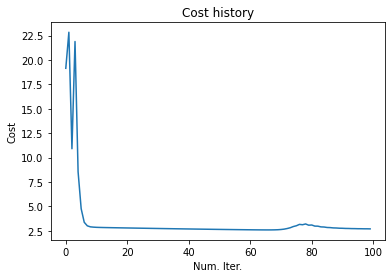

Weights: [[ 2.20222991]
 [-1.56667746]]
Bias: [-1.6667686]


In [17]:
plt.title("Cost history")
plt.plot(hist_c)
plt.xlabel("Num. Iter.")
plt.ylabel("Cost")
plt.show()
print(f"Weights: {lbr_model.weights}")
print(f"Bias: {lbr_model.bias}")

(-0.9, 6.5)

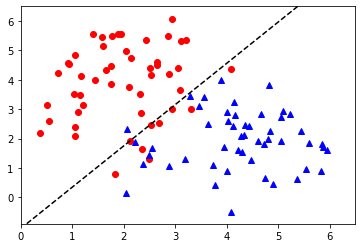

In [36]:
# Visualize the data (with decision boundary)
xlims = [0, 6.5]
w1, w2 = map(float, lbr_model.weights)
b = float(lbr_model.bias)
x2_x1 = lambda x1: (-b-x1*w1)/w2
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
plt.plot([xlims[0], xlims[1]], [x2_x1(xlims[0]), x2_x1(xlims[1])], 
    'k--')
plt.xlim(xlims)
plt.ylim(-0.9, 6.5)


In [26]:
w1

2.202229913989541